In [1]:
%matplotlib inline
import datetime
import re #regular expressions
import MySQLdb
import pandas.io.sql as sql
import pandas as pd
import numpy
from matplotlib import pyplot as plt
pd.set_option('display.max_rows', 2000)

In [2]:
#get data from db
conn = MySQLdb.connect(host="localhost", port=3306, user="root", db="disney_db") #make db connection
cursor = conn.cursor()

In [3]:
#twitter data
cursor.execute("SELECT id, timestamp, location FROM twitter_data_copy WHERE location = 'anaheim' AND timestamp > '2015-08-04' AND timestamp < '2015-09-12' ")
rows = cursor.fetchall()
tweetdf = pd.DataFrame( [[ij for ij in i] for i in rows] )
tweetdf.rename(columns={0: 'tweetid', 1: 'timestamps'}, inplace=True)
#print tweetdf.head()

In [4]:
#wait time data
cursor.execute("SELECT * FROM recorded_dl_crowd_data")
wtrows = cursor.fetchall()
#print wtrows
waitdf = pd.DataFrame( [[ij for ij in i] for i in wtrows] )
#print waitdf.head()

In [5]:
#done importing so close SQL connection
conn.close()

In [45]:
alltimes = waitdf.ix[:,5:34]
alltimes2 = alltimes.apply(lambda x: pd.to_numeric(x, errors='coerce'))
#print alltimes2.ix[:,5]
meanwaits = pd.DataFrame(alltimes2.apply(numpy.nanmean, axis=1))
meanwaits.rename(columns={0: 'meanwait'}, inplace=True)

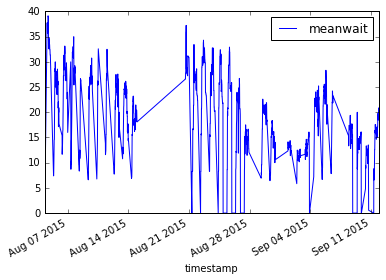

In [47]:
frames = [waitdf.ix[:,0], meanwaits]
dl_data = pd.concat(frames, axis=1)
dl_data = dl_data.dropna()
dl_data.rename(columns={0: 'timestamp'}, inplace=True)
#print dl_data.head()
dl_data.plot(x='timestamp', y='meanwait')

In [ ]:
#now bin by hour